In [2]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.131 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6277.7/8062.4 GB disk)


In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="35scjW2UsFO5mOJi5WoD")
project = rf.workspace("mosab-2hukp").project("my-first-projectsidee")
version = project.version(2)
dataset = version.download("yolov11")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 71.9 MB/s eta 0:00:00:00:010:01
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.10.0 requires tensorflow==2.17.0, but you have tensorflow 2.17.1 which is incompatible.
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to My-First-Projectsidee-2 in yolov11:: 100%|██████████| 6092/6092 [00:01<00:00, 5513.45it/s]


In [4]:
!yolo predict /kaggle/input/model11/best.pt source='/kaggle/input/data-mer/test/test/images/-4405-_png_jpg.rf.82b5c10b2acd1cfaa24259ada8e599fe.jpg'

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 903, in entrypoint
    check_dict_alignment(full_args_dict, {a: ""})
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 498, in check_dict_alignment
    raise SyntaxError(string + CLI_HELP_MSG) from e
SyntaxError: '/kaggle/input/model11/best.pt' is not a valid YOLO argument. 

    Arguments received: ['yolo', 'predict', '/kaggle/input/model11/best.pt', 'source=/kaggle/input/data-mer/test/test/images/-4405-_png_jpg.rf.82b5c10b2acd1cfaa24259ada8e599fe.jpg']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of frozenset({'obb', 'pose', 'classify', 'detect', 'segment'})
                MODE (required) is one of frozenset({'predict', 'train', 'benchmark', 'export', 'track', 'val'})
             

In [3]:
!yolo val model=yolo11n.pt data=coco8.yaml

Ultralytics 8.3.101 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

Dataset 'coco8.yaml' images not found ⚠️, missing path '/kaggle/working/datasets/coco8/images/val'
100%|████████████████████████████████████████| 433k/433k [00:00<00:00, 12.6MB/s]
Unzipping /kaggle/working/datasets/coco8.zip to /kaggle/working/datasets/coco8..
Dataset download success ✅ (0.3s), saved to /kaggle/working/datasets

100%|████████████████████████████████████████| 755k/755k [00:00<00:00, 17.7MB/s]
val: Scanning /kaggle/working/datasets/coco8/labels/val... 4 images, 0 backgroun
val: New cache created: /kaggle/working/datasets/coco8/labels/val.cache
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all          4         17       0.57       0.85      0.847      0.632
                person          3         10      0.557        0.6      0.585      0.272
         

In [3]:
import warnings
warnings.filterwarnings("ignore")

import os
import re
import glob
import random
import yaml

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
from scipy.spatial.distance import jensenshannon

import IPython.display as display
from PIL import Image
import cv2

from ultralytics import YOLO

In [23]:
class CFG:
    # ... (tout ton code existant)

    # Ajoute ceci :
    FOLDERS = ["train", "valid", "test"]

    PPE_CLASSES = {
        0: 'helmet',
        1: 'no_helmet',
        2: 'goggles',
        3: 'no_goggles',
        4: 'gloves',
        5: 'no_gloves',
        6: 'boots',
        7: 'no_boots',
        8: 'safety_vest',
        9: 'no_safety_vest',
        10: 'mask',
        11: 'no_mask',
        12: 'person',
        13: 'safety_cone',
        14: 'machinery',
        15: 'vehicle',
    }

    CSS_DATA_PATH = "/kaggle/input/data-equiement/equiepement"


In [13]:
class CFG:
    # Mode debug
    DEBUG = False
    FRACTION = 0.05 if DEBUG else 1.0
    SEED = 42

    # Nouvelles classes fusionnées
    CLASSES = [
        'helmet', 
        'Gloves',
        'Vest', 
        'Boots', 
        'Goggles',
        'none',
        'Person', 
        'no_helmet', 
        'no_goggle', 
        'no_gloves',
        'no_boots',   
    ]
    PPE_CLASSES = {i: name for i, name in enumerate(CLASSES)}
    NUM_CLASSES_TO_TRAIN = len(CLASSES)

    # Répertoires fusionnés
    FOLDERS = ['train', 'valid', 'test']  # si tu n’as pas de "test", enlève-le
    CUSTOM_DATASET_DIR = '/kaggle/working/My-First-Projectsidee-2'
    OUTPUT_PATH = './'
    WORKING_PATH = "/kaggle/working/"# dossier racine contenant les dossiers train/val/test
    # Hyperparamètres d'entraînement
    EPOCHS = 3 if DEBUG else 50
    BATCH_SIZE = 16
    OPTIMIZER = 'auto'
    LR = 1e-3
    LR_FACTOR = 0.01
    WEIGHT_DECAY = 5e-4
    DROPOUT = 0.0
    PATIENCE = 20
    LABEL_SMOOTHING = 0.0
    PROFILE = False



    # Répertoires de sortie
    OUTPUT_DIR = './'


In [3]:
import os
import yaml

dict_file = {
    'train': os.path.join(CFG.CUSTOM_DATASET_DIR, 'train','train'),
    'val': os.path.join(CFG.CUSTOM_DATASET_DIR, 'val','val'),
    'test': os.path.join(CFG.CUSTOM_DATASET_DIR, 'test','test'),
    'nc': CFG.NUM_CLASSES_TO_TRAIN,
    'names': CFG.CLASSES
}

# ✅ Écriture dans un répertoire autorisé
dataset_path = os.path.join(CFG.OUTPUT_DIR, 'data.yaml')
with open(dataset_path, 'w') as file:
    yaml.dump(dict_file, file)

print(f"Fichier dataset.yaml enregistré à : {dataset_path}")


Fichier dataset.yaml enregistré à : ./data.yaml


In [40]:
def display_image(image, print_info = True, hide_axis = False):
    if isinstance(image, str):  # Check if it's a file path
        img = Image.open(image)
        plt.imshow(img)
    elif isinstance(image, np.ndarray):  # Check if it's a NumPy array
        image = image[..., ::-1]  # BGR to RGB
        img = Image.fromarray(image)
        plt.imshow(img)
    else:
        raise ValueError("Unsupported image format")

    if print_info:
        print('Type: ', type(img), '\n')
        print('Shape: ', np.array(img).shape, '\n')

    if hide_axis:
        plt.axis('off')

    plt.show()

Type:  <class 'PIL.JpegImagePlugin.JpegImageFile'> 

Shape:  (640, 640, 3) 



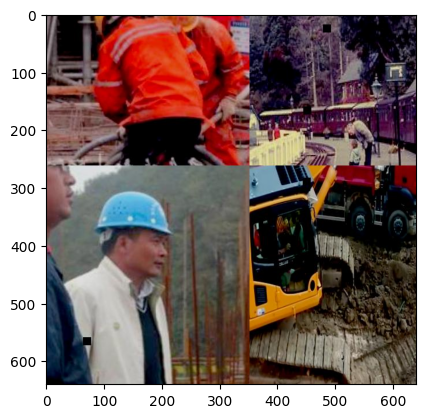

In [8]:
example_image_path = '/kaggle/input/construction-site-safety-image-dataset-roboflow/css-data/train/images/-2297-_png_jpg.rf.9fff3740d864fbec9cda50d783ad805e.jpg'
display_image(example_image_path, print_info = True, hide_axis = False)

In [43]:
def plot_random_images_from_folder(folder_path, num_images=20, seed=CFG.SEED):
    
    random.seed(seed)

    # Get a list of image files in the folder
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg', '.gif'))]

    # Ensure that we have at least num_images files to choose from
    if len(image_files) < num_images:
        raise ValueError("Not enough images in the folder")

    # Randomly select num_images image files
    selected_files = random.sample(image_files, num_images)

    # Create a subplot grid
    num_cols = 5
    num_rows = (num_images + num_cols - 1) // num_cols
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

    for i, file_name in enumerate(selected_files):
        # Open and display the image using PIL
        img = Image.open(os.path.join(folder_path, file_name))
        
        if num_rows == 1:
            ax = axes[i % num_cols]
        else:
            ax = axes[i // num_cols, i % num_cols]
        
        ax.imshow(img)
        ax.axis('off')
        # ax.set_title(file_name)

    # Remove empty subplots
    for i in range(num_images, num_rows * num_cols):
        if num_rows == 1:
            fig.delaxes(axes[i % num_cols])
        else:
            fig.delaxes(axes[i // num_cols, i % num_cols])

    plt.tight_layout()
    plt.show()

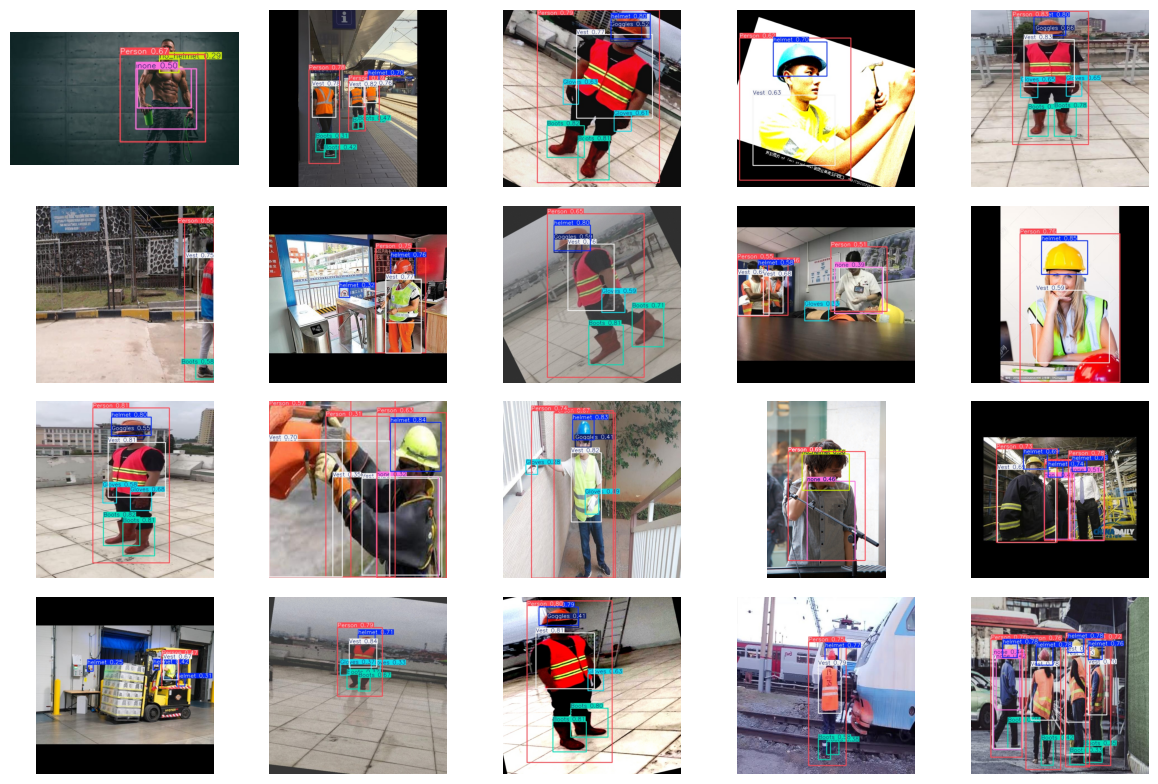

In [44]:
folder_path = '/kaggle/working/resultat'
plot_random_images_from_folder(folder_path, num_images=20, seed=CFG.SEED)
# plot_random_images_from_folder(folder_path, num_images=20, seed=54)

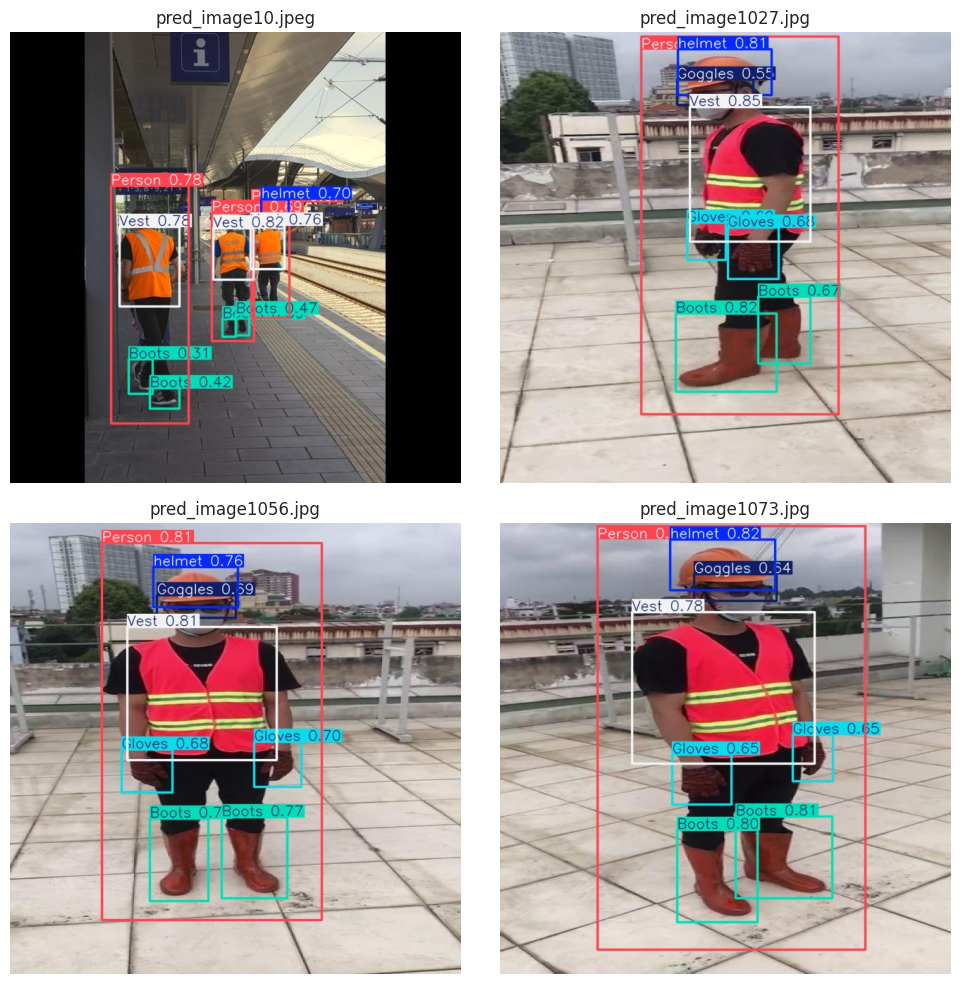

In [45]:
import matplotlib.pyplot as plt
from PIL import Image
import os

output_folder = "/kaggle/working/resultat"  # dossier contenant les images annotées
image_names = sorted(os.listdir(output_folder))[:4]  # les 4 premières images

plt.figure(figsize=(10, 10))
for i, image_name in enumerate(image_names):
    image_path = os.path.join(output_folder, image_name)
    img = Image.open(image_path)
    plt.subplot(2, 2, i + 1)
    plt.imshow(img)
    plt.title(image_name)
    plt.axis('off')
plt.tight_layout()
plt.show()


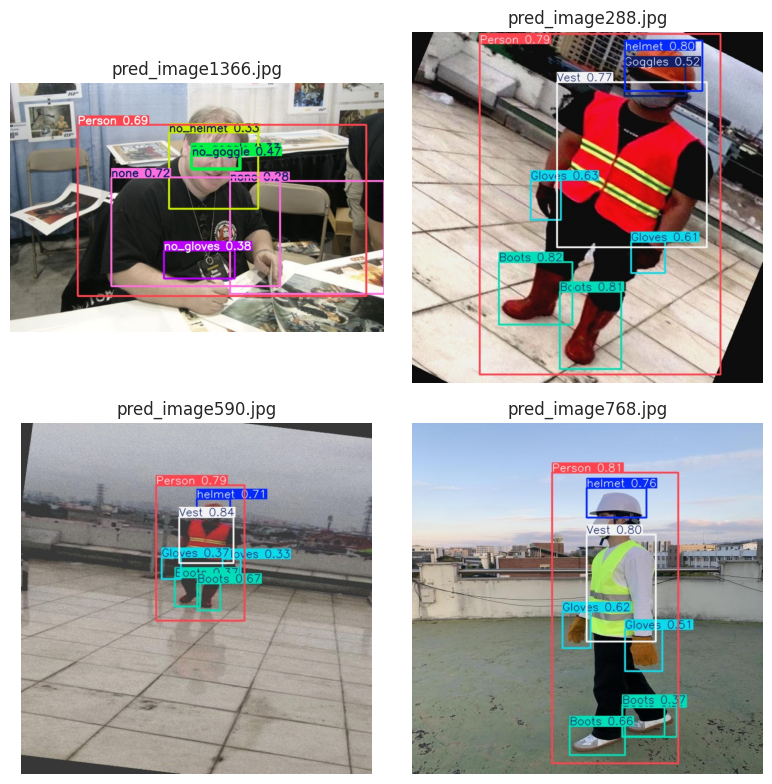

In [56]:
import matplotlib.pyplot as plt
from PIL import Image
import os
import random

# Dossier contenant les images annotées
output_folder = "/kaggle/working/resultat"
image_files = [f for f in os.listdir(output_folder) if f.endswith(('.jpg','jpeg','.png'))]

# Tirage aléatoire de 4 images (ou moins si moins d'images)
num_images = 4
random_images = random.sample(image_files, min(len(image_files), num_images))

# Affichage
plt.figure(figsize=(8, 8))
for i, img_name in enumerate(random_images):
    img_path = os.path.join(output_folder, img_name)
    img = Image.open(img_path)
    plt.subplot(2, 2, i + 1)
    plt.imshow(img)
    plt.title(img_name)
    plt.axis("off")

plt.tight_layout()
plt.show()


In [14]:
!yolo val model=yolo11n.pt data=/kaggle/working/dataset.yaml cache=False

100%|██████████████████████████████████████| 5.35M/5.35M [00:00<00:00, 72.2MB/s]
Ultralytics 8.3.130 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 981, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 630, in val
    validator(model=self.model)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 116, in decorate_context
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/validator.py", line 179, in __call__
    self.data = check_det_dataset(self.args.data)
  File "/usr/local/lib/python3.10/dist-packages/ultr

In [20]:
!yolo train model=yolo11m.pt data=/kaggle/working/data.yaml epochs=50 imgsz=640 cache=True lr0=0.001 device=0,1

100%|███████████████████████████████████████| 38.8M/38.8M [00:00<00:00, 259MB/s]
Ultralytics 8.3.131 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
                                                        CUDA:1 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/data.yaml, degrees=0.0, deterministic=True, device=0,1, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=Fals

In [10]:
# Export the model
model.export(
    format = 'onnx', # openvino, onnx, engine, tflite
    imgsz = [640,640],
    half = False,
    int8 = False,
    simplify = False,
    nms = False,
)

NameError: name 'model' is not defined

In [7]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt source=/kaggle/input/construction-site-safety-image-dataset-roboflow/css-data/test/images/000005_jpg.rf.96e9379ccae638140c4a90fc4b700a2b.jpg save=True show=True

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

Ultralytics 8.3.101 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,584,102 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /kaggle/input/construction-site-safety-image-dataset-roboflow/css-data/test/images/000005_jpg.rf.96e9379ccae638140c4a90fc4b700a2b.jpg: 640x640 2 Hardhats, 3 NO-Masks, 3 Persons, 10.0ms
Speed: 3.2ms preprocess, 10.0ms inference, 206.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [33]:
pip install supervision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 3.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


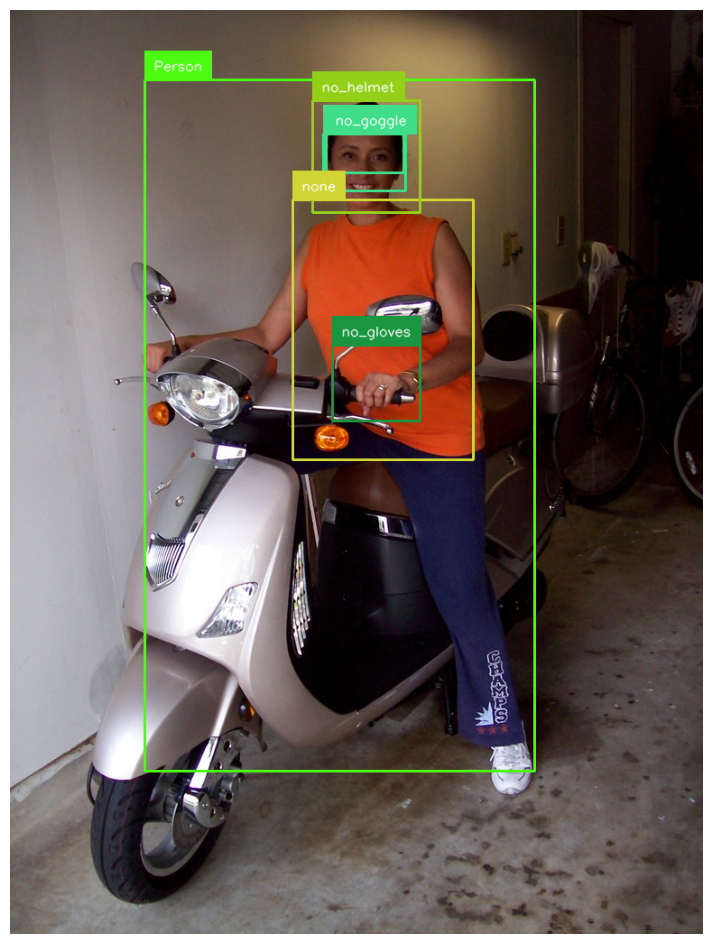

In [34]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')
import cv2
from ultralytics import YOLO
import supervision as sv


image_path = '/kaggle/input/data-safety-equipement/test/test/images/image1229.jpg'
image = cv2.imread(image_path)


results = model(image, verbose=False)[0]
detections = sv.Detections.from_ultralytics(results)

box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = image.copy()
annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

In [42]:
from ultralytics import YOLO  # Fonctionne pour YOLOv8 et YOLOv11
import os
from PIL import Image

# Charger le modèle
model = YOLO("/kaggle/working/runs/detect/train/weights/best.pt")  # Change ce nom selon ton modèle

# Dossier contenant les images
image_folder = "/kaggle/working/test/images"
output_folder = "/kaggle/working/resultat"
os.makedirs(output_folder, exist_ok=True)

# Boucle sur les images
for image_name in os.listdir(image_folder):
    if image_name.endswith((".jpg", ".png", ".jpeg")):
        image_path = os.path.join(image_folder, image_name)

        # Faire la prédiction
        results = model(image_path)

        # Sauvegarder l'image annotée
        save_path = os.path.join(output_folder, f"pred_{image_name}")
        results[0].save(filename=save_path)  # Sauvegarde avec les boxes

        print(f"Image traitée : {image_name}")



image 1/1 /kaggle/working/test/images/image54.jpg: 640x640 1 helmet, 2 Glovess, 1 Vest, 2 Bootss, 1 Person, 36.8ms
Speed: 1.6ms preprocess, 36.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Image traitée : image54.jpg

image 1/1 /kaggle/working/test/images/image176.jpg: 640x640 1 helmet, 1 Vest, 1 none, 1 Person, 36.9ms
Speed: 1.4ms preprocess, 36.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Image traitée : image176.jpg

image 1/1 /kaggle/working/test/images/image802.jpg: 640x640 1 helmet, 2 Vests, 1 Person, 36.9ms
Speed: 1.3ms preprocess, 36.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Image traitée : image802.jpg

image 1/1 /kaggle/working/test/images/image181.jpg: 640x640 1 helmet, 2 Vests, 1 Person, 36.8ms
Speed: 1.3ms preprocess, 36.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Image traitée : image181.jpg

image 1/1 /kaggle/working/test/images/image1354.jpg: 448x640 1 Goggles, 5 nones, 4

In [36]:
model('/kaggle/input/construction-site-safety-image-dataset-roboflow/css-data/test/images/autox3_mp4-187_jpg.rf.8340e2bd65afade3fb0d3194eadc5796.jpg')

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Hardhat', 1: 'Mask', 2: 'NO-Hardhat', 3: 'NO-Mask', 4: 'NO-Safety Vest', 5: 'Person', 6: 'Safety Cone', 7: 'Safety Vest', 8: 'machinery', 9: 'vehicle'}
 obb: None
 orig_img: array([[[ 34,  42,  35],
         [ 23,  31,  24],
         [ 20,  28,  21],
         ...,
         [255, 251, 248],
         [245, 240, 237],
         [253, 248, 245]],
 
        [[ 33,  41,  34],
         [ 23,  31,  24],
         [ 20,  28,  21],
         ...,
         [255, 252, 249],
         [246, 241, 238],
         [251, 246, 243]],
 
        [[ 33,  40,  33],
         [ 24,  31,  24],
         [ 21,  28,  21],
         ...,
         [255, 252, 249],
         [248, 243, 240],
         [250, 245, 242]],
 
        ...,
 
        [[ 35,  30,  27],
         [ 43,  38,  35],
         [ 54,  49,  46],
         ...,
         [ 44,  42,  41],
         [ 55,  56,  5

In [12]:
!yolo export model=/kaggle/working/yolo11n.pt format='onnx'

Ultralytics 8.3.101 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.00GHz)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

PyTorch: starting from '/kaggle/working/yolo11n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (5.4 MB)

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.49...
ONNX: export success ✅ 1.4s, saved as '/kaggle/working/yolo11n.onnx' (10.2 MB)

Export complete (2.0s)
Results saved to /kaggle/working
Predict:         yolo predict task=detect model=/kaggle/working/yolo11n.onnx imgsz=640  
Validate:        yolo val task=detect model=/kaggle/working/yolo11n.onnx imgsz=640 data=/usr/src/ultralytics/ultralytics/cfg/datasets/coco.yaml  
Visualize:       https://netron.app
💡 Learn more at https://docs.ultralytics.com/modes/export


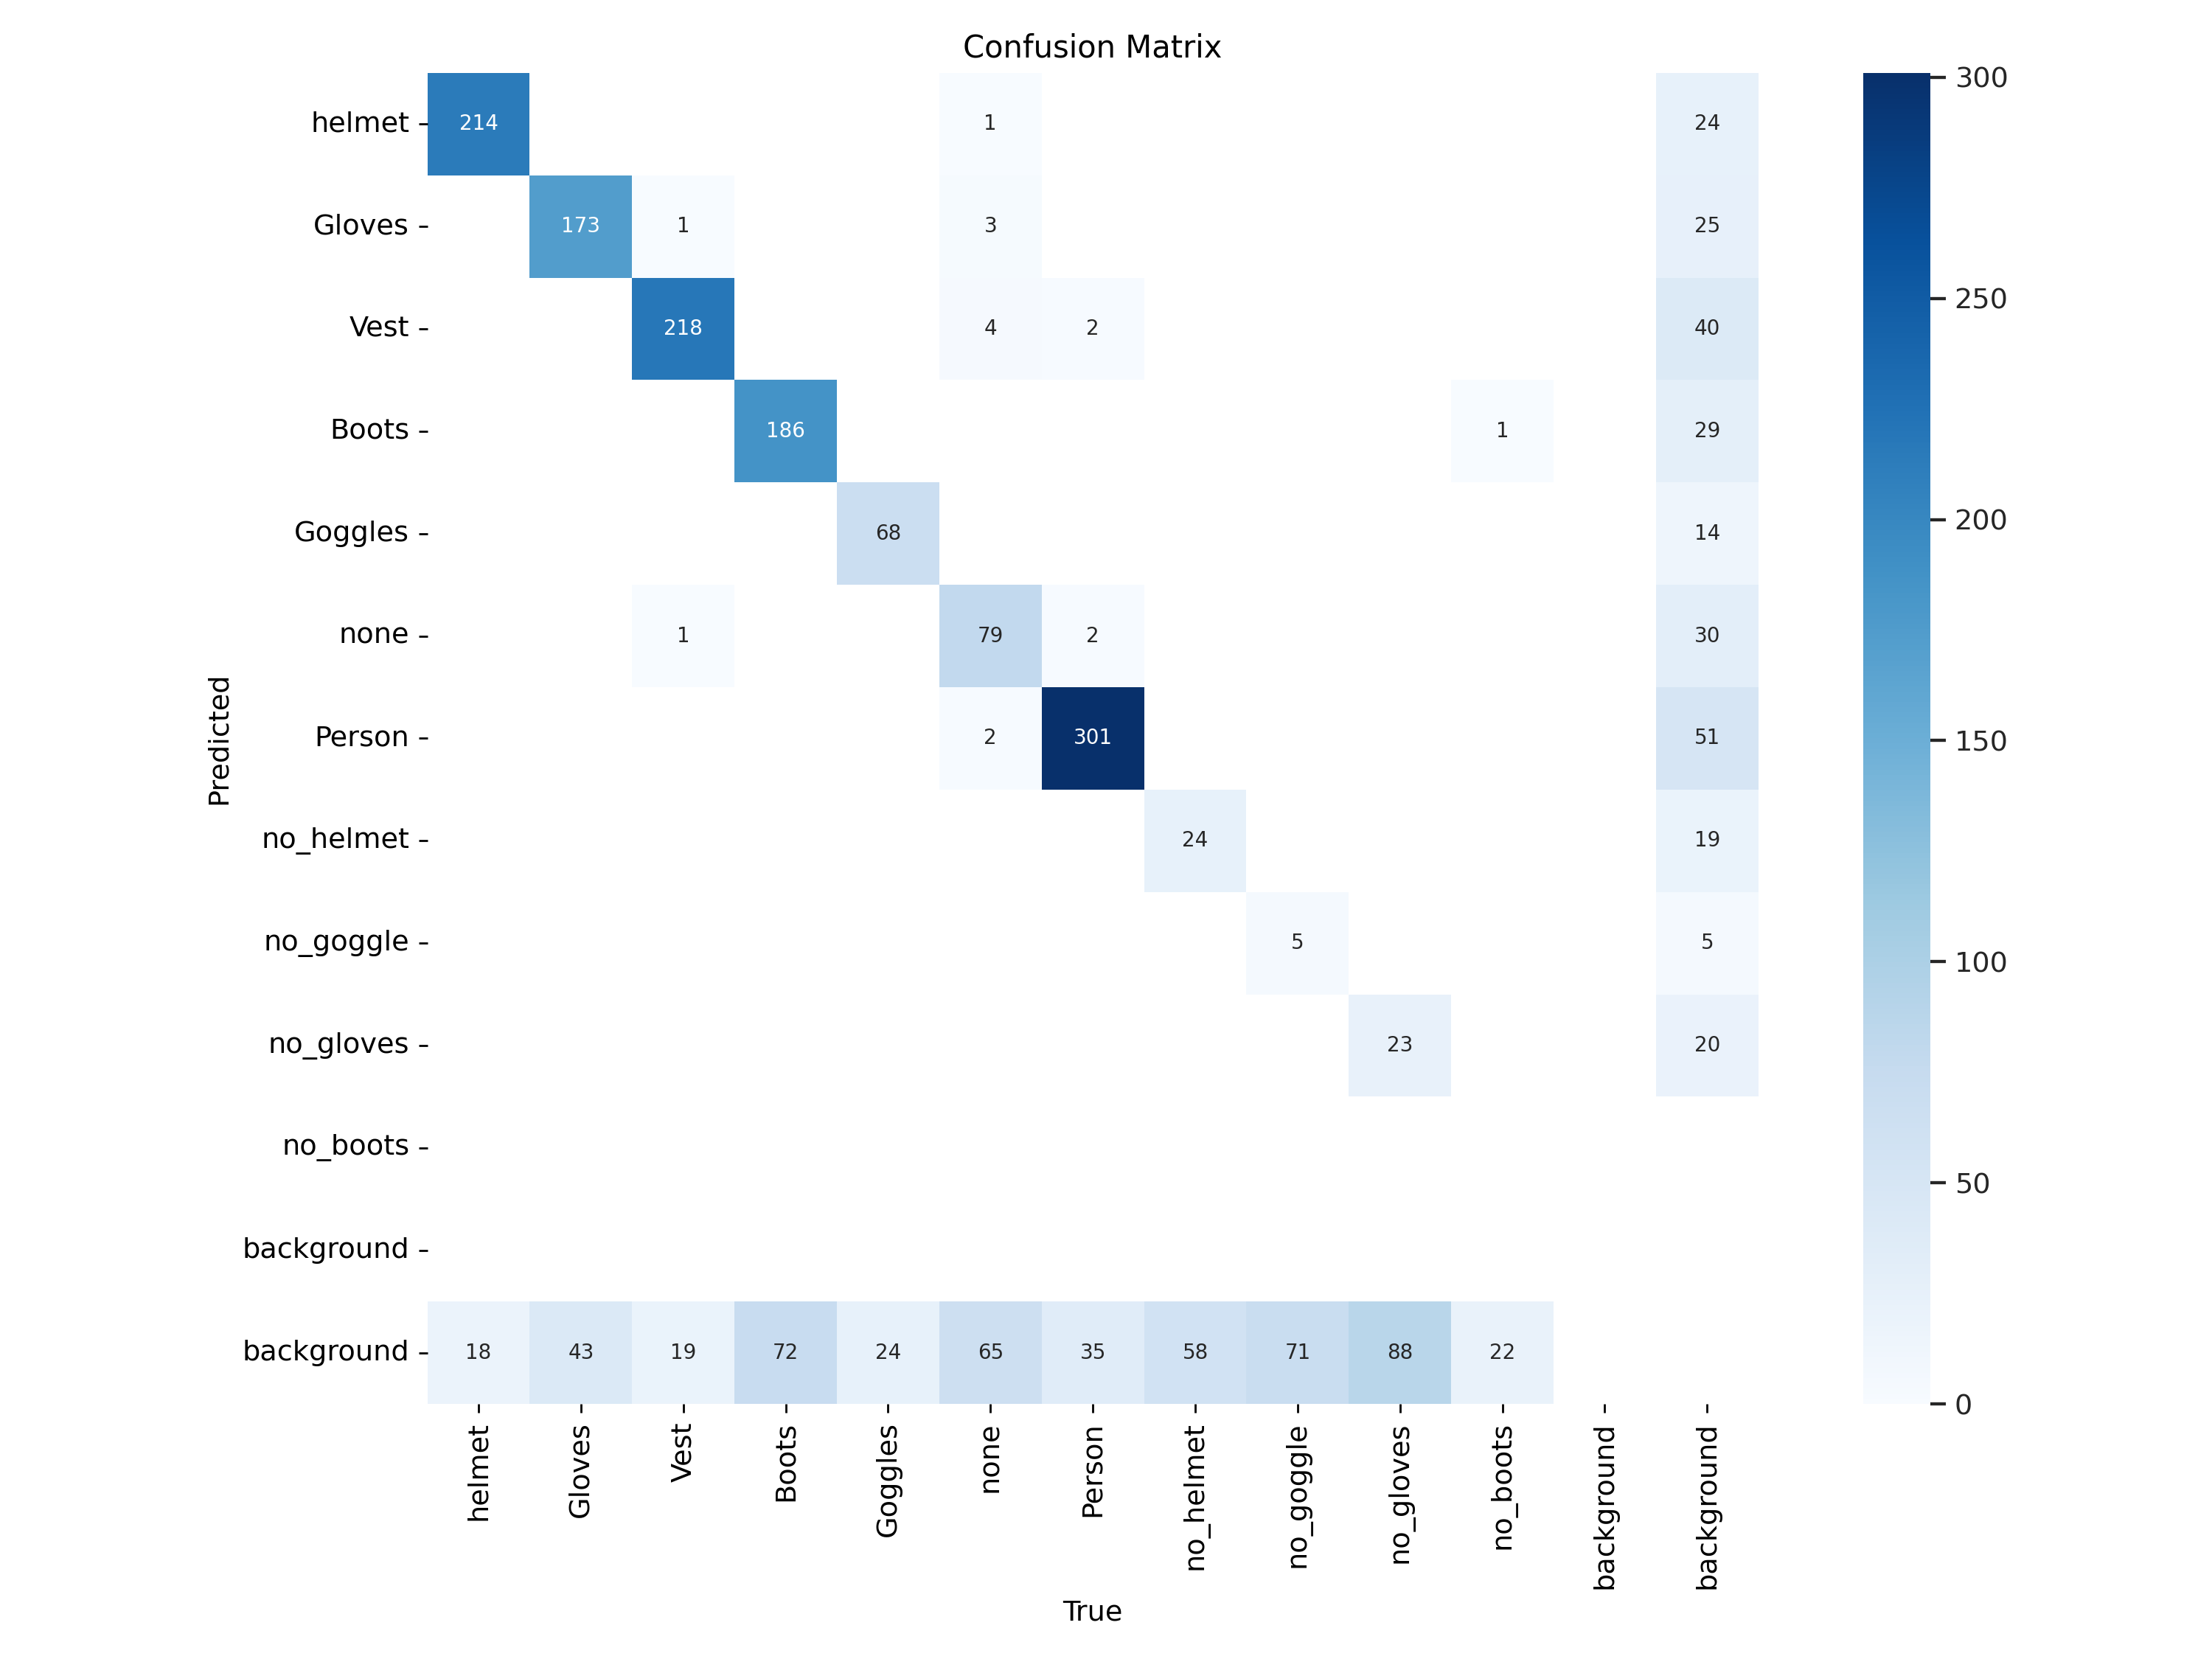

In [31]:
from IPython.display import Image

Image(filename='/kaggle/working/runs/detect/train/confusion_matrix.png', width=1000)

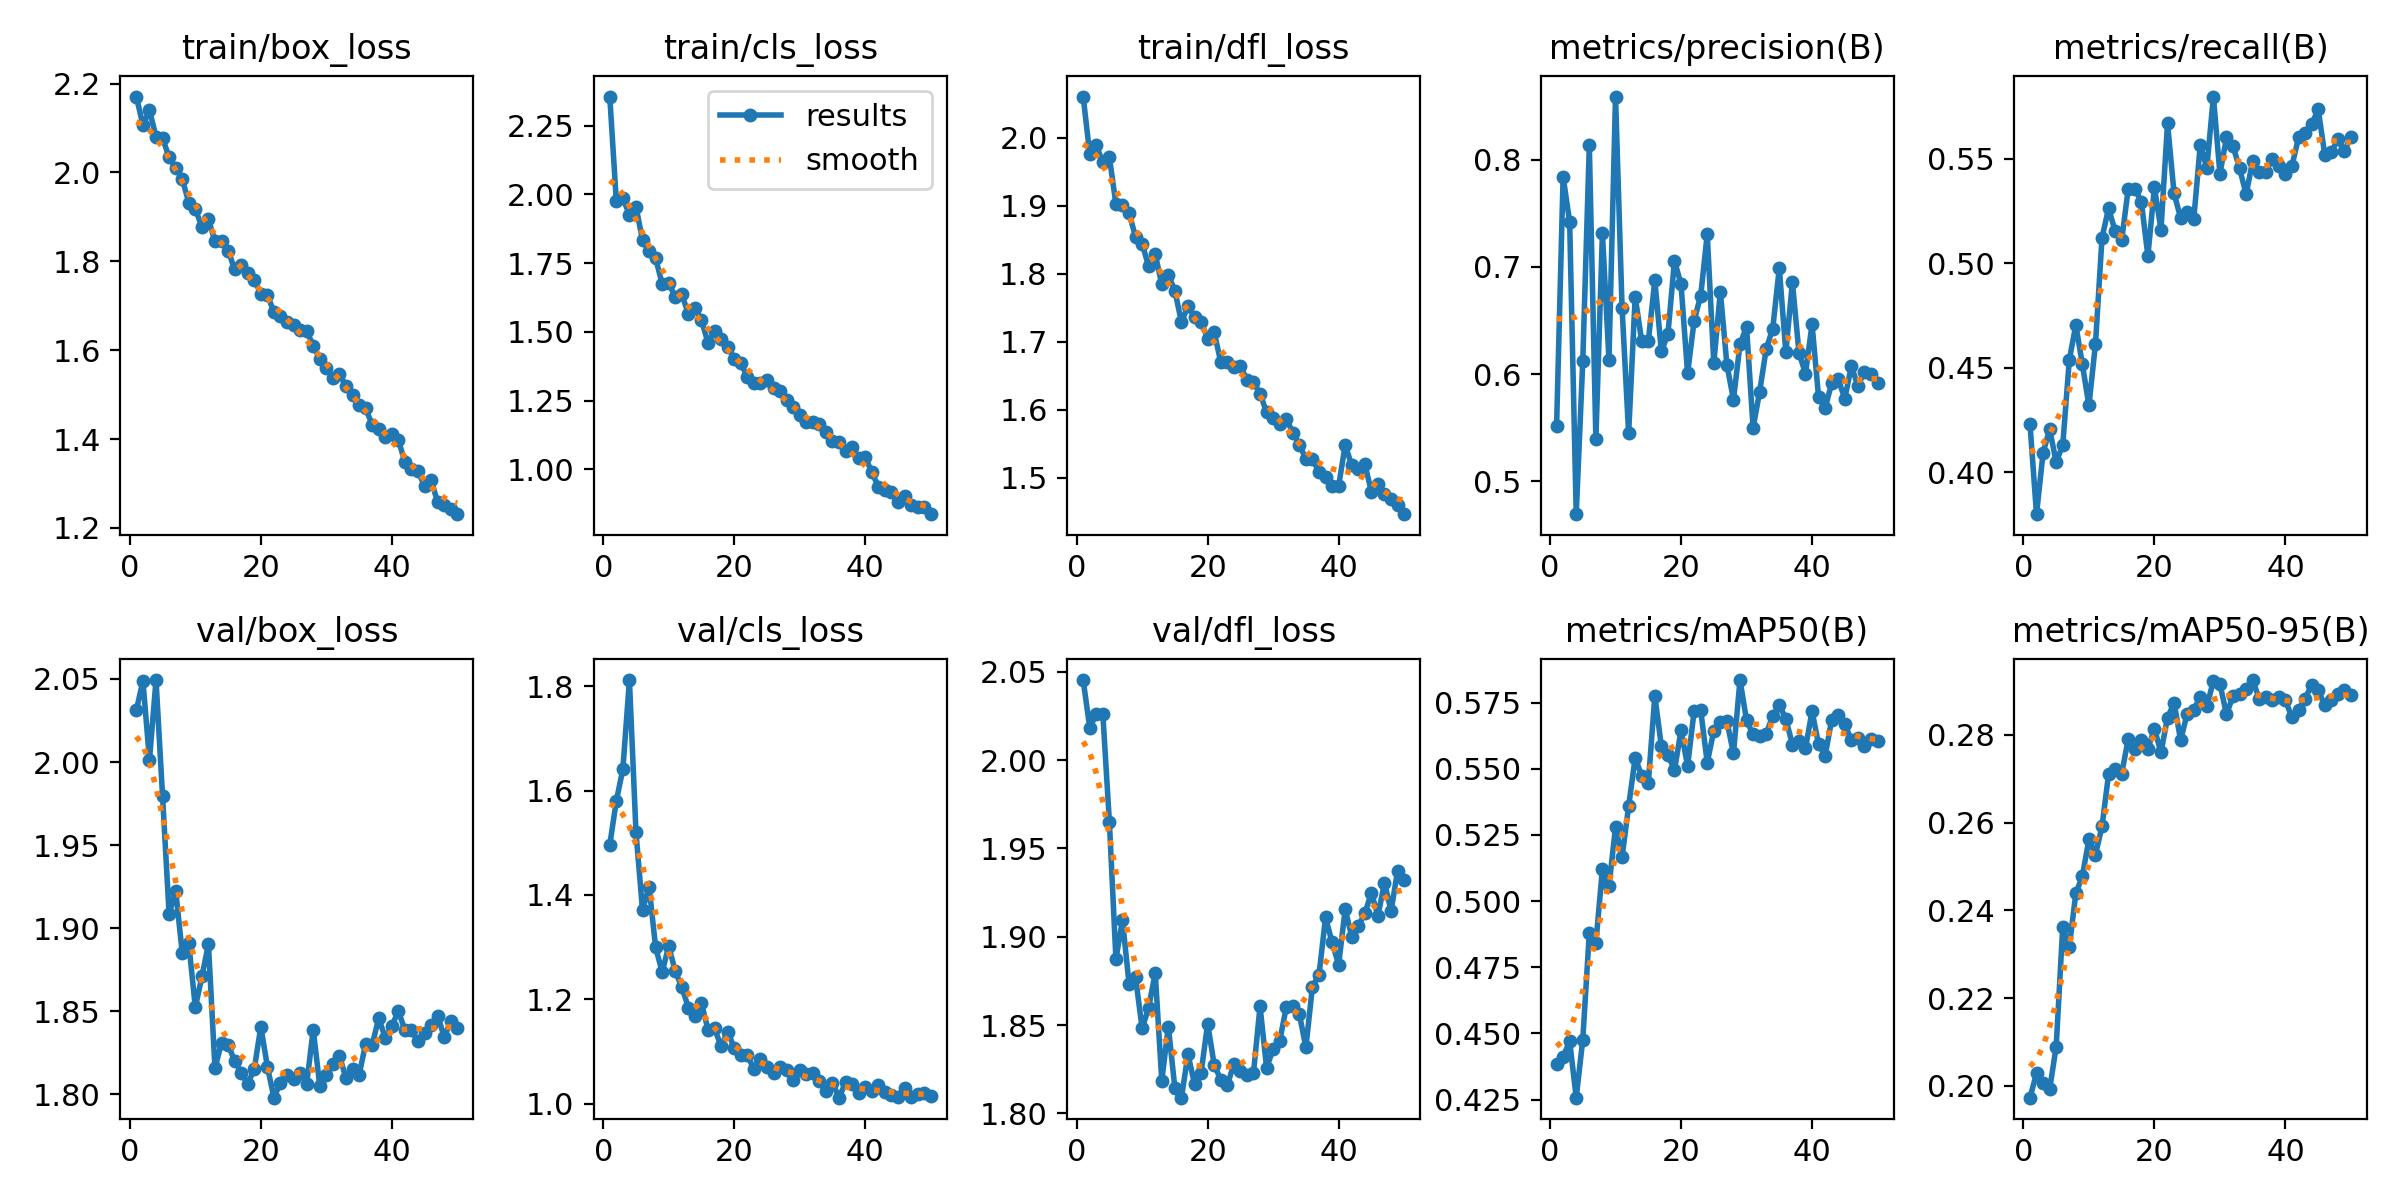

In [37]:
from IPython.display import Image

Image(filename='/kaggle/working/runs/detect/train/results.png', width=1000)


**DATA AUGUMENTATION**

In [5]:
import os
import matplotlib.pyplot as plt

# Configuration
class CFG:
    CSS_DATA_PATH = '/kaggle/input/data-quipement'
    OUTPUT_PATH = './'
    TARGET_RATIOS = {'train': 0.80, 'val': 0.15, 'test': 0.05}
    WORKING_PATH = "/kaggle/working/"
    FOLDERS = ["train", "valid", "test"]
    SEED = 42
    PPE_CLASSES = {
        0: "helmet",
        1: "Gloves",
        2: "Vest",
        3: "Boots",
        4: "Goggles",
        5: "none",
        6: "Person",
        7: "no_helmet",
        8: "no_goggle",
        9: "no_gloves",
        10: "no_boots",    }
    DROPOUT = 0.0
    PATIENCE = 20
    LABEL_SMOOTHING = 0.0
    PROFILE = False# Classes from PPE dataset (0-9)
    OUTPUT_PATH = './'
    WORKING_PATH = "/kaggle/working/"

In [6]:
import glob
import pandas as pd
import numpy as np
# Classes from PPE dataset (0-9)
classes = list(CFG.PPE_CLASSES.keys())

# Initialize an empty list to store image metadata
data = []

# Iterate over train, valid, and test folders
for folder in CFG.FOLDERS:
    label_path = os.path.join(CFG.CSS_DATA_PATH, folder, 'labels')
    label_files = glob.glob(os.path.join(label_path, '*.txt'))

    for label_file in label_files:
        # Extract image filename (without extension)
        img_name = os.path.basename(label_file).replace('.txt', '')

        # Initialize class presence as 0 for all classes
        class_presence = {cls: 0 for cls in CFG.PPE_CLASSES.keys()}

        # Read the label file and mark presence of each class
        with open(label_file, 'r') as f:
            lines = f.readlines()
            for line in lines:
                class_id = int(line.split()[0])  # Extract class ID
                class_presence[class_id] = 1  # Mark presence (1)

        # Create a row with the filename, origin, and class presence
        row = {'filename': img_name, 'origin': folder}
        row.update(class_presence)

        # Append to the dataset
        data.append(row)

# Convert list to DataFrame
df_total = pd.DataFrame(data)

# Print dataset summary
print(f"📊 Total images: {len(df_total)}")
print(df_total.head())

📊 Total images: 1426
    filename origin  0  1  2  3  4  5  6  7  8  9  10
0    image18  train  1  0  0  1  0  1  1  0  0  0   0
1   image428  train  1  1  1  1  1  0  1  0  0  0   0
2   image918  train  1  1  1  1  1  0  1  0  0  0   0
3  image1315  train  0  0  0  0  0  1  1  1  1  1   0
4   image290  train  1  1  1  0  1  0  1  0  0  0   0


In [7]:
for folder in CFG.FOLDERS:
    image_path = os.path.join(CFG.CSS_DATA_PATH, folder, "images")
    label_path = os.path.join(CFG.CSS_DATA_PATH, folder, "labels")

    images = set(f.rsplit(".", 1)[0] for f in os.listdir(image_path) if f.endswith((".jpg", ".png")))
    labels = set(f.rsplit(".", 1)[0] for f in os.listdir(label_path) if f.endswith(".txt"))

    missing_labels = images - labels  # Imagens sem labels
    missing_images = labels - images  # Labels sem imagens

    print(f"📂 {folder.upper()} SET:")
    print(f" - Total Images: {len(images)}")
    print(f" - Total Labels: {len(labels)}")
    print(f" - Sample Image Names: {list(images)[:2]}")
    print(f" - Sample Label Names: {list(labels)[:2]}")
    print(f" - Missing Labels: {len(missing_labels)} → {list(missing_labels)[:2]}")
    print(f" - Missing Images: {len(missing_images)} → {list(missing_images)[:2]}")
    print("-" * 40)

📂 TRAIN SET:
 - Total Images: 1013
 - Total Labels: 1142
 - Sample Image Names: ['image625', 'image1126']
 - Sample Label Names: ['image625', 'image624']
 - Missing Labels: 0 → []
 - Missing Images: 129 → ['image44', 'image930']
----------------------------------------
📂 VALID SET:
 - Total Images: 123
 - Total Labels: 143
 - Sample Image Names: ['image547', 'image464']
 - Sample Label Names: ['image547', 'image961']
 - Missing Labels: 0 → []
 - Missing Images: 20 → ['image961', 'image141']
----------------------------------------
📂 TEST SET:
 - Total Images: 127
 - Total Labels: 141
 - Sample Image Names: ['image1292', 'image180']
 - Sample Label Names: ['image1292', 'image180']
 - Missing Labels: 0 → []
 - Missing Images: 14 → ['image700', 'image10']
----------------------------------------


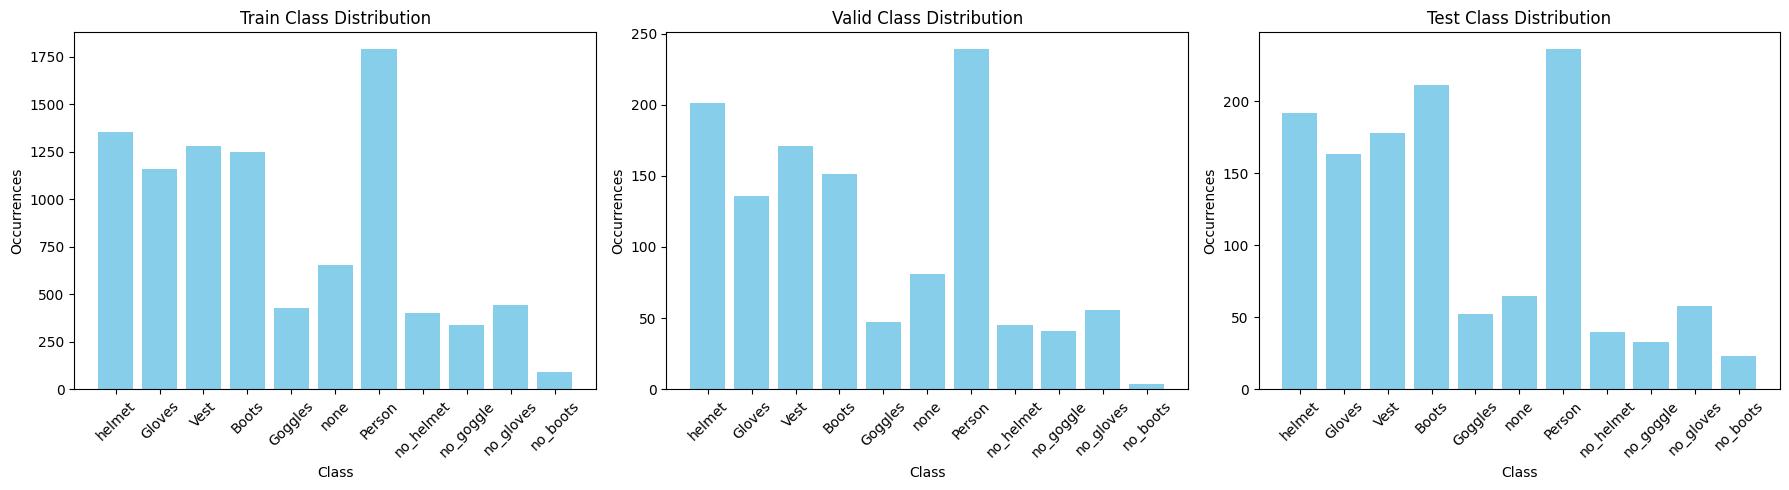

In [8]:
# Initialize class counters
class_counts = {folder: {cls: 0 for cls in CFG.PPE_CLASSES.keys()} for folder in CFG.FOLDERS}

# Count occurrences of each class in train and validation datasets
for folder in CFG.FOLDERS:
    label_path = os.path.join(CFG.CSS_DATA_PATH, folder, "labels")
    label_files = [f for f in os.listdir(label_path) if f.endswith(".txt")]

    for label_file in label_files:
        file_path = os.path.join(label_path, label_file)
        
        with open(file_path, "r") as f:
            lines = f.readlines()
        
        for line in lines:
            class_id = int(line.split()[0])  # Extract class ID from each annotation
            class_counts[folder][class_id] += 1  # Increment class count

# Plot class distribution with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # Adjust for three plots

for i, folder in enumerate(CFG.FOLDERS):
    counts = class_counts[folder]
    classes = [CFG.PPE_CLASSES[k] for k in counts.keys()]
    values = list(counts.values())

    axes[i].bar(classes, values, color="skyblue")
    axes[i].set_title(f"{folder.capitalize()} Class Distribution")
    axes[i].set_xlabel("Class")
    axes[i].set_ylabel("Occurrences")
    axes[i].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

In [9]:
train_data = []
valid_data = []
test_data = []

# Vérification des sous-ensembles de folders
print("FOLDERS:", CFG.FOLDERS)

# Définir explicitement les ratios pour chaque sous-ensemble
CFG.TARGET_RATIOS = {'train': 0.80, 'valid': 0.15, 'test': 0.05}

# Définir les proportions cibles
target_ratios = CFG.TARGET_RATIOS
total_images = len(df_total)

# Calculer les tailles cibles
target_sizes = {subset: int(total_images * target_ratios[subset]) for subset in ['train', 'valid', 'test']}  # Liste explicite

# Initialiser les compteurs pour la distribution des classes dans chaque sous-ensemble
class_distribution = {
    'train': {cls: 0 for cls in CFG.PPE_CLASSES.keys()},
    'valid': {cls: 0 for cls in CFG.PPE_CLASSES.keys()},
    'test': {cls: 0 for cls in CFG.PPE_CLASSES.keys()}
}

# Mélanger df_total pour randomiser l'ordre des images
df_total = df_total.sample(frac=1, random_state=CFG.SEED).reset_index(drop=True)

# Étape 1 : Remplir le dataset TRAIN d'abord
for _, row in df_total.iterrows():
    if len(train_data) < target_sizes['train']:
        train_data.append(row)
        for cls in CFG.PPE_CLASSES.keys():
            class_distribution['train'][cls] += row[cls]

# Images restantes à distribuer entre valid et test
remaining_images = df_total[~df_total['filename'].isin([x['filename'] for x in train_data])]

# Étape 2 : Distribuer les images restantes à VALID et TEST
for _, row in remaining_images.iterrows():
    if len(valid_data) < target_sizes['valid']:
        valid_data.append(row)
        for cls in CFG.PPE_CLASSES.keys():
            class_distribution['valid'][cls] += row[cls]
    elif len(test_data) < target_sizes['test']:
        test_data.append(row)
        for cls in CFG.PPE_CLASSES.keys():
            class_distribution['test'][cls] += row[cls]

# Étape 3 : Si des images sont restantes, les affecter à train
remaining_images = df_total[~df_total['filename'].isin([x['filename'] for x in train_data + valid_data + test_data])]

for _, row in remaining_images.iterrows():
    train_data.append(row)
    for cls in CFG.PPE_CLASSES.keys():
        class_distribution['train'][cls] += row[cls]

# Convertir les listes en DataFrames
df_train = pd.DataFrame(train_data)
df_valid = pd.DataFrame(valid_data)
df_test = pd.DataFrame(test_data)

# Vérifier les distributions des classes
print("Class distribution in train set:", class_distribution['train'])
print("Class distribution in valid set:", class_distribution['valid'])
print("Class distribution in test set:", class_distribution['test'])


FOLDERS: ['train', 'valid', 'test']
Class distribution in train set: {0: 853, 1: 573, 2: 849, 3: 535, 4: 378, 5: 327, 6: 1075, 7: 227, 8: 207, 9: 185, 10: 27}
Class distribution in valid set: {0: 148, 1: 106, 2: 151, 3: 108, 4: 87, 5: 75, 6: 208, 7: 47, 8: 48, 9: 43, 10: 9}
Class distribution in test set: {0: 56, 1: 35, 2: 57, 3: 34, 4: 23, 5: 25, 6: 66, 7: 9, 8: 10, 9: 8, 10: 0}


total_df


In [10]:
classes = list(CFG.PPE_CLASSES.keys())

# Initialize an empty list to store image metadata
data = []

# Iterate over train, valid, and test folders
for folder in CFG.FOLDERS:
    label_path = os.path.join(CFG.CSS_DATA_PATH, folder, 'labels')
    label_files = glob.glob(os.path.join(label_path, '*.txt'))

    for label_file in label_files:
        # Extract image filename (without extension)
        img_name = os.path.basename(label_file).replace('.txt', '')

        # Initialize class presence as 0 for all classes
        class_presence = {cls: 0 for cls in CFG.PPE_CLASSES.keys()}

        # Read the label file and mark presence of each class
        with open(label_file, 'r') as f:
            lines = f.readlines()
            for line in lines:
                class_id = int(line.split()[0])  # Extract class ID
                class_presence[class_id] = 1  # Mark presence (1)
 # Create a row with the filename, origin, and class presence
        row = {'filename': img_name, 'origin': folder}
        row.update(class_presence)

        # Append to the dataset
        data.append(row)

# Convert list to DataFrame
df_total = pd.DataFrame(data)

# Print dataset summary
print(f"📊 Total images: {len(df_total)}")
print(df_total.head())

📊 Total images: 1426
    filename origin  0  1  2  3  4  5  6  7  8  9  10
0    image18  train  1  0  0  1  0  1  1  0  0  0   0
1   image428  train  1  1  1  1  1  0  1  0  0  0   0
2   image918  train  1  1  1  1  1  0  1  0  0  0   0
3  image1315  train  0  0  0  0  0  1  1  1  1  1   0
4   image290  train  1  1  1  0  1  0  1  0  0  0   0


In [11]:
train_data = []
valid_data = []
test_data = []

# Define target proportions
target_ratios = CFG.TARGET_RATIOS  # {'train': 0.80, 'valid': 0.15, 'test': 0.05}
total_images = len(df_total)
target_sizes = {subset: int(total_images * target_ratios[subset]) for subset in CFG.FOLDERS}

# Initialize counters for class distribution in each set
class_distribution = {
    'train': {cls: 0 for cls in CFG.PPE_CLASSES.keys()},
    'valid': {cls: 0 for cls in CFG.PPE_CLASSES.keys()},
    'test': {cls: 0 for cls in CFG.PPE_CLASSES.keys()}
}

# Shuffle df_total to randomize image order
df_total = df_total.sample(frac=1, random_state=CFG.SEED).reset_index(drop=True)

# Step 1: Fill TRAIN dataset first
for _, row in df_total.iterrows():
    if len(train_data) < target_sizes['train']:
        train_data.append(row)
        for cls in CFG.PPE_CLASSES.keys():
            class_distribution['train'][cls] += row[cls]
            
# Remaining images to be distributed between valid and test
remaining_images = df_total[~df_total['filename'].isin([x['filename'] for x in train_data])]

# Step 2: Distribute remaining images to VALID and TEST
for _, row in remaining_images.iterrows():
    if len(valid_data) < target_sizes['valid']:
        valid_data.append(row)
        for cls in CFG.PPE_CLASSES.keys():
            class_distribution['valid'][cls] += row[cls]
    elif len(test_data) < target_sizes['test']:
        test_data.append(row)
        for cls in CFG.PPE_CLASSES.keys():
            class_distribution['test'][cls] += row[cls]

# Step 3: If any images are left, assign them to train
remaining_images = df_total[~df_total['filename'].isin([x['filename'] for x in train_data + valid_data + test_data])]

for _, row in remaining_images.iterrows():
    train_data.append(row)
    for cls in CFG.PPE_CLASSES.keys():
        class_distribution['train'][cls] += row[cls]

# Convert lists to DataFrames
df_train = pd.DataFrame(train_data)
df_valid = pd.DataFrame(valid_data)
df_test = pd.DataFrame(test_data)


In [12]:
total_assigned = len(df_train) + len(df_valid) + len(df_test)

# Actual proportions
train_ratio = len(df_train) / total_assigned
valid_ratio = len(df_valid) / total_assigned
test_ratio = len(df_test) / total_assigned

# Display proportions
print(f"✅ Total assigned images: {total_assigned} (Expected: {len(df_total)})")
print(f"📊 Train: {len(df_train)} images ({train_ratio:.2%})")
print(f"📊 Validation: {len(df_valid)} images ({valid_ratio:.2%})")
print(f"📊 Test: {len(df_test)} images ({test_ratio:.2%})")

# Check if any images are missing
missing_images = set(df_total['filename']) - set(df_train['filename']) - set(df_valid['filename']) - set(df_test['filename'])

if missing_images:
    print(f"⚠️ {len(missing_images)} image(s) were not assigned!")
    print("🔍 Displaying details of missing images in df_total:")
     # Display details of missing images
    missing_df = df_total[df_total['filename'].isin(missing_images)]
    print(missing_df)  # Displays the DataFrame in the notebook
else:
    print("✅ No images were lost!")

✅ Total assigned images: 1426 (Expected: 1426)
📊 Train: 1142 images (80.08%)
📊 Validation: 213 images (14.94%)
📊 Test: 71 images (4.98%)
✅ No images were lost!


In [13]:
import matplotlib.pyplot as plt
# from matplotlib.patches import Rectangle
import seaborn as sns
from scipy.spatial.distance import jensenshannon

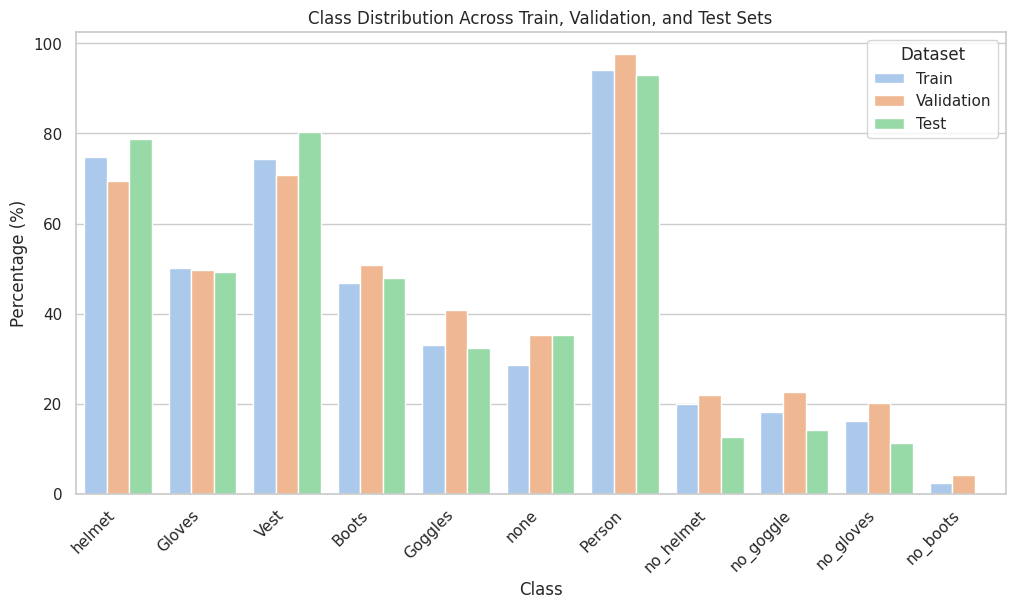

In [14]:
sns.set_theme(style="whitegrid")  # Define o tema

# Calculate class distributions in percentage
def compute_class_percentage(df):
    total = len(df)
    return {cls: (df[cls].sum() / total) * 100 for cls in CFG.PPE_CLASSES.keys()}

train_percentages = compute_class_percentage(df_train)
valid_percentages = compute_class_percentage(df_valid)
test_percentages = compute_class_percentage(df_test)

# Convert to a DataFrame for Seaborn
df_plot = pd.DataFrame({
    "Class": list(CFG.PPE_CLASSES.values()) * 3,  # Repete as classes 3 vezes (para cada conjunto)
    "Percentage": list(train_percentages.values()) + list(valid_percentages.values()) + list(test_percentages.values()),
    "Dataset": ["Train"] * len(train_percentages) + ["Validation"] * len(valid_percentages) + ["Test"] * len(test_percentages)
})

# Create the plot using sns.barplot
plt.figure(figsize=(12, 6))
sns.barplot(x="Class", y="Percentage", hue="Dataset", data=df_plot, palette="pastel")

# Labels and formatting
plt.xlabel("Class")
plt.ylabel("Percentage (%)")
plt.title("Class Distribution Across Train, Validation, and Test Sets")
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.show()

In [15]:
train_dist = np.array(list(train_percentages.values()))
valid_dist = np.array(list(valid_percentages.values()))
test_dist = np.array(list(test_percentages.values()))

# Compute standard deviation (how spread out the class distributions are)
train_std = np.std(train_dist)
valid_std = np.std(valid_dist)
test_std = np.std(test_dist)

# Compute Coefficient of Variation (CV) to assess balance
train_cv = (train_std / np.mean(train_dist)) * 100
valid_cv = (valid_std / np.mean(valid_dist)) * 100
test_cv = (test_std / np.mean(test_dist)) * 100

# Compute Jensen-Shannon divergence between Train-Valid and Train-Test
jsd_train_valid = jensenshannon(train_dist, valid_dist)
jsd_train_test = jensenshannon(train_dist, test_dist)

# Print results
print(f"📊 Standard Deviation of Class Distribution:")
print(f"   Train: {train_std:.2f}, Valid: {valid_std:.2f}, Test: {test_std:.2f}")
print(f"\n📊 Coefficient of Variation (Lower is better):")
print(f"   Train: {train_cv:.2f}%, Valid: {valid_cv:.2f}%, Test: {test_cv:.2f}%")

print(f"\n📊 Jensen-Shannon Divergence (Lower is better):")
print(f"   Train vs Valid: {jsd_train_valid:.4f}, Train vs Test: {jsd_train_test:.4f}")

📊 Standard Deviation of Class Distribution:
   Train: 27.76, Valid: 26.12, Test: 30.14

📊 Coefficient of Variation (Lower is better):
   Train: 66.60%, Valid: 59.43%, Test: 72.87%

📊 Jensen-Shannon Divergence (Lower is better):
   Train vs Valid: 0.0391, Train vs Test: 0.0633


In [16]:
import yaml
import shutil

In [17]:
import os
import shutil
import glob

# Création des dossiers
for folder in CFG.FOLDERS:
    os.makedirs(os.path.join(CFG.WORKING_PATH, folder, "images"), exist_ok=True)
    os.makedirs(os.path.join(CFG.WORKING_PATH, folder, "labels"), exist_ok=True)

# Nettoyer les noms de fichiers qui contiennent des duplications comme (1)
def clean_filename(name):
    return name.split('(')[0].strip() if '(' in name else name

# Appliquer la fonction de nettoyage aux DataFrames
df_train["filename"] = df_train["filename"].apply(clean_filename)
df_valid["filename"] = df_valid["filename"].apply(clean_filename)
df_test["filename"] = df_test["filename"].apply(clean_filename)

# Fonction pour trouver l’image avec n’importe quelle extension (et casse)
def find_image_path(base_path, filename):
    # Recherche avec glob insensible à la casse
    pattern = os.path.join(base_path, "images", filename + ".*")
    matches = glob.glob(pattern)
    
    # Recherche manuelle si rien trouvé
    if not matches:
        for ext in ['jpg', 'jpeg', 'png', 'bmp']:
            for variant in [ext, ext.upper()]:
                candidate = os.path.join(base_path, "images", f"{filename}.{variant}")
                if os.path.exists(candidate):
                    return candidate
    return matches[0] if matches else None

# Fonction pour déplacer les fichiers
def move_files(df, subset):
    for _, row in df.iterrows():
        filename = row["filename"]
        origin = row["origin"]
        origin_path = os.path.join(CFG.CSS_DATA_PATH, origin)

        # Trouver le chemin réel de l’image
        img_src = find_image_path(origin_path, filename)
        label_src = os.path.join(origin_path, "labels", filename + ".txt")

        if img_src:
            ext = os.path.splitext(img_src)[1]  # garde l'extension d’origine
            img_dst = os.path.join(CFG.WORKING_PATH, subset, "images", filename + ext)
            shutil.copy(img_src, img_dst)
        else:
            print(f"⚠️ Image not found: {filename} (any format)")

        if os.path.exists(label_src):
            label_dst = os.path.join(CFG.WORKING_PATH, subset, "labels", filename + ".txt")
            shutil.copy(label_src, label_dst)
        else:
            print(f"⚠️ Label not found: {label_src}")

# Déplacer les fichiers pour chaque subset
move_files(df_train, "train")
move_files(df_valid, "valid")
move_files(df_test, "test")

print("✅ Dataset reorganization complete!")


✅ Dataset reorganization complete!


In [18]:
# ✅ Store the original class distribution BEFORE augmentation
original_class_counts = {cls: 0 for cls in CFG.PPE_CLASSES.keys()}

for _, row in df_train.iterrows():
    for cls in CFG.PPE_CLASSES.keys():
        if row[cls] == 1:
            original_class_counts[cls] += 1

# ✅ Convert to numpy array for later comparison
original_counts = np.array(list(original_class_counts.values()), dtype=np.float64)
original_counts<5


array([False, False, False, False, False, False, False, False, False,
       False, False])

In [20]:
PPE_CLASSES_INV = {v: k for k, v in CFG.PPE_CLASSES.items()}

# Classes for augmentation
target_classes = ['no_boots','no_gloves','no_goggle','no_helmet']
excluded_classes = []

# Directories for images and labels
img_dir = os.path.join(CFG.WORKING_PATH, "train", "images")
label_dir = os.path.join(CFG.WORKING_PATH, "train", "labels")

# Counter for cloned images
cloned_count = 0

# Create new images and labels for augmentation
for _, row in df_train.iterrows():
    filename = row["filename"]

    # Check if the image contains at least one of the target classes
    contains_target = any(row[PPE_CLASSES_INV[cls]] == 1 for cls in target_classes)
    
    # Allow images with up to 1 occurrence of "Person" or "Machinery"
    excluded_count = sum(row[PPE_CLASSES_INV[cls]] for cls in excluded_classes)
    
    if contains_target and excluded_count <= 1:
        # Define paths for image and label
        img_path = os.path.join(img_dir, filename + ".jpg")
        label_path = os.path.join(label_dir, filename + ".txt")

        if os.path.exists(img_path) and os.path.exists(label_path):
            # Read the original image
            img = cv2.imread(img_path)

            # Apply transformations: flipping, rotation, brightness
            augmentations = {
                "flipped": cv2.flip(img, 1),  # Horizontal flip
                "rotated": cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE),  # Rotate 90 degrees
            "brightened": cv2.convertScaleAbs(img, alpha=1.2, beta=20)  # Increase brightness
            }

            for aug_type, aug_img in augmentations.items():
                # Create new filenames
                new_filename = f"{filename}_{aug_type}"
                new_img_path = os.path.join(img_dir, new_filename + ".jpg")
                new_label_path = os.path.join(label_dir, new_filename + ".txt")

                # Save augmented image
                cv2.imwrite(new_img_path, aug_img)

                # Copy label file (bounding boxes remain unchanged)
                with open(label_path, "r") as f:
                    label_data = f.readlines()

                with open(new_label_path, "w") as f:
                    f.writelines(label_data)

                cloned_count += 1

print(f"✅ {cloned_count} augmented images created (using flipping, rotation, and brightness adjustments).")

✅ 705 augmented images created (using flipping, rotation, and brightness adjustments).


In [21]:
# Define new DataFrame for augmented training set
df_train_augmented = []

# Paths for images and labels
train_img_dir = os.path.join(CFG.WORKING_PATH, "train", "images")
train_label_dir = os.path.join(CFG.WORKING_PATH, "train", "labels")

# Get all label files
label_files = glob.glob(os.path.join(train_label_dir, "*.txt"))

# Rebuild DataFrame by reading label files
for label_file in label_files:
    filename = os.path.basename(label_file).replace(".txt", "")

    # Read label file
    class_presence = {cls: 0 for cls in CFG.PPE_CLASSES.keys()}
    with open(label_file, "r") as f:
        lines = f.readlines()
        for line in lines:
            class_id = int(line.split()[0])  # Extract class ID
            class_presence[class_id] = 1  # Mark presence of class

    # Append to new DataFrame
    row = {"filename": filename, "origin": "train"}
    row.update(class_presence)
    df_train_augmented.append(row)

# Convert to DataFrame
df_train_augmented = pd.DataFrame(df_train_augmented)

# Print summary
print(f"📊 New Train Dataset: {len(df_train_augmented)} images (after augmentation).")

📊 New Train Dataset: 1840 images (after augmentation).


**DATA AFTER AUGUMETATION**

📊 Standard Deviation of Class Distribution:
   Before: 317.00, After: 392.63

📊 Coefficient of Variation (Lower is better):
   Before: 66.60%, After: 49.50%

📊 Jensen-Shannon Divergence (Lower is better): 0.1888

📊 Relative Change per Class (%):
   helmet: 1.29%
   Gloves: 2.62%
   Vest: -0.35%
   Boots: 14.77%
   Goggles: 16.14%
   none: 213.15%
   Person: 64.37%
   no_helmet: 300.00%
   no_goggle: 300.00%
   no_gloves: 300.00%
   no_boots: 300.00%


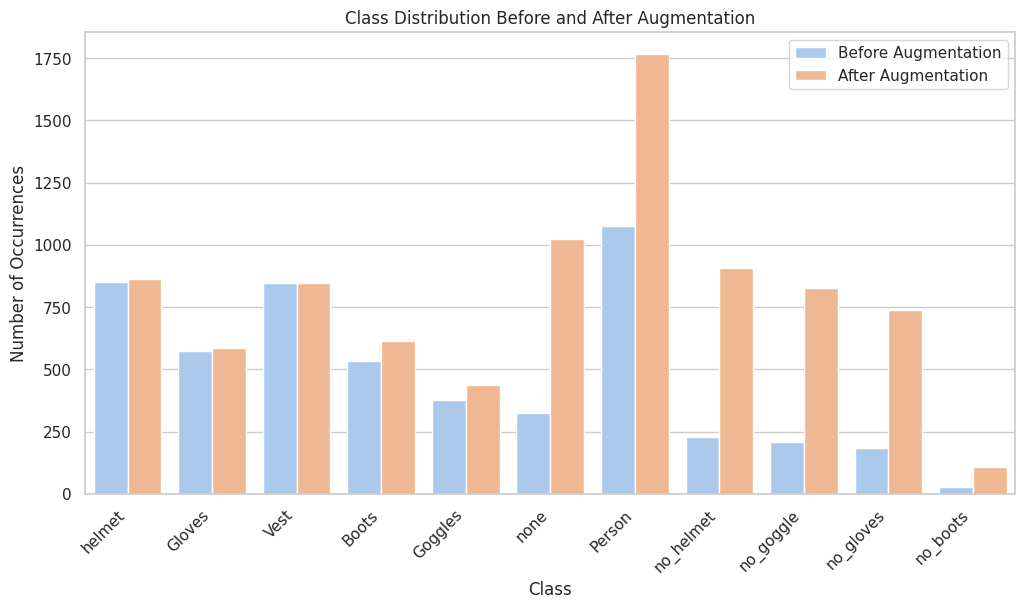

In [22]:
augmented_class_counts = {cls: 0 for cls in CFG.PPE_CLASSES.keys()}
for _, row in df_train_augmented.iterrows():
    for cls in CFG.PPE_CLASSES.keys():
        if row[cls] == 1:
            augmented_class_counts[cls] += 1

# Convert to numpy arrays
augmented_counts = np.array(list(augmented_class_counts.values()), dtype=np.float64)

# ✅ Compute standard deviation and coefficient of variation BEFORE augmentation
original_mean, original_std = np.mean(original_counts), np.std(original_counts)
original_cv = (original_std / original_mean) * 100

# ✅ Compute standard deviation and coefficient of variation AFTER augmentation
augmented_mean, augmented_std = np.mean(augmented_counts), np.std(augmented_counts)
augmented_cv = (augmented_std / augmented_mean) * 100

# ✅ Jensen-Shannon Divergence (Lower is better)
jsd = jensenshannon(original_counts, augmented_counts)

# ✅ Compute percentage change per class
relative_change = ((augmented_counts - original_counts) / original_counts) * 100

# ✅ Print results
print(f"📊 Standard Deviation of Class Distribution:")
print(f"   Before: {original_std:.2f}, After: {augmented_std:.2f}")

print(f"\n📊 Coefficient of Variation (Lower is better):")
print(f"   Before: {original_cv:.2f}%, After: {augmented_cv:.2f}%")

print(f"\n📊 Jensen-Shannon Divergence (Lower is better): {jsd:.4f}")

print("\n📊 Relative Change per Class (%):")
for cls, change in zip(CFG.PPE_CLASSES.values(), relative_change):
    print(f"   {cls}: {change:.2f}%")
    
# ✅ Plot class distribution BEFORE and AFTER augmentation
df_plot = pd.DataFrame({
    "Class": np.array(list(CFG.PPE_CLASSES.values())),  
    "Before Augmentation": original_counts,
    "After Augmentation": augmented_counts
})

# Melt for Seaborn
df_plot_melted = df_plot.melt(id_vars=["Class"], var_name="Dataset", value_name="Occurrences")

# ✅ Plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x="Class", y="Occurrences", hue="Dataset", data=df_plot_melted, palette="pastel")
plt.xlabel("Class")
plt.ylabel("Number of Occurrences")
plt.title("Class Distribution Before and After Augmentation")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.show()

In [23]:
import os

img_path = os.path.join(CFG.WORKING_PATH, "train", "images")
label_path = os.path.join(CFG.WORKING_PATH, "train", "labels")

# Extensions valides d'image
valid_image_exts = [".jpg", ".jpeg", ".png", ".bmp", ".tif", ".tiff"]

# Fonction pour vérifier si un fichier est une image
def is_image_file(filename):
    return os.path.splitext(filename)[1].lower() in valid_image_exts

# Compter les fichiers
num_images = len([f for f in os.listdir(img_path) if is_image_file(f)])
num_labels = len([f for f in os.listdir(label_path) if f.lower().endswith(".txt")])

print(f"📂 Total images in train folder: {num_images}")
print(f"📂 Total labels in train folder: {num_labels}")


📂 Total images in train folder: 1840
📂 Total labels in train folder: 1840


In [34]:
def save_yaml_file(dataset_yaml, dataset_config):
    with open(dataset_yaml, "w") as f:
        yaml.dump(dataset_config, f, default_flow_style=False)
    
    print(f"✅ Dataset YAML file saved at: {dataset_yaml}")

### read yaml file created
def read_yaml_file(file_path):
    with open(file_path, 'r') as file:
        try:
            data = yaml.safe_load(file)
            return data
        except yaml.YAMLError as e:
            print("Error reading YAML:", e)
            return None

### print it with newlines
def print_yaml_data(data):
    formatted_yaml = yaml.dump(data, default_style=False)
    print(formatted_yaml)

In [36]:
dataset_yaml = os.path.join(CFG.WORKING_PATH, "dataset.yaml")

# Create YAML content
dataset_config = {
    "path": CFG.WORKING_PATH,  # Base path
    "train": "train/images",  # Train images folder
    "val": "valid/images",  # Validation images folder
    "test": "test/images",  # Test images folder
    "nc": len(CFG.PPE_CLASSES),  # Number of classes
    "names": list(CFG.PPE_CLASSES.values()),  # Class names
}

In [37]:
save_yaml_file(dataset_yaml, dataset_config)

✅ Dataset YAML file saved at: /kaggle/working/dataset.yaml


In [38]:
yaml_data = read_yaml_file(dataset_yaml)

if yaml_data:
    print_yaml_data(yaml_data)

names:
- helmet
- Gloves
- Vest
- Boots
- Goggles
- none
- Person
- no_helmet
- no_goggle
- no_gloves
- no_boots
- background
nc: 12
path: /kaggle/working/
test: test/images
train: train/images
val: valid/images



**FINETUNING**

On va faire le finetuining sur  notre nouvelle dataset 

In [30]:
!yolo train model=yolo11m.pt data=/kaggle/working/dataset.yaml epochs=50 imgsz=640 cache=True lr0=0.001 device=0,1

100%|███████████████████████████████████████| 38.8M/38.8M [00:00<00:00, 199MB/s]
Ultralytics 8.3.131 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
                                                        CUDA:1 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/dataset.yaml, degrees=0.0, deterministic=True, device=0,1, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=F

In [58]:
import shutil

shutil.copy('/kaggle/working/runs/detect/train/weights/best.pt', 'best.pt')


'best.pt'

In [43]:
import shutil

# 🔹 Compresse tout le dossier runs/detect/train/ dans un zip
shutil.make_archive('valid', 'zip', '/kaggle/working/valid')


'/kaggle/working/valid.zip'

In [39]:
import os
import shutil

# Chemin vers le dataset téléchargé
DOWNLOAD_PATH = "//kaggle/working/"  # 🔁 remplace par ton vrai chemin
EXTENSIONS = [".jpg", ".jpeg", ".png", ".bmp"]

def is_image_file(f):
    return os.path.splitext(f)[1].lower() in EXTENSIONS

def clean_folder(subset_path):
    img_path = os.path.join(subset_path, "images")
    label_path = os.path.join(subset_path, "labels")

    # Nettoyage des noms avec (1), (2), etc.
    for folder in [img_path, label_path]:
        for f in os.listdir(folder):
            if "(" in f and ")" in f:
                new_name = f.split("(")[0].strip() + os.path.splitext(f)[1]
                old = os.path.join(folder, f)
                new = os.path.join(folder, new_name)
                if not os.path.exists(new):  # évite les conflits
                    os.rename(old, new)
                else:
                    os.remove(old)  # supprime les doublons foireux

    # Recalcul des noms de base
    images = {os.path.splitext(f)[0] for f in os.listdir(img_path) if is_image_file(f)}
    labels = {os.path.splitext(f)[0] for f in os.listdir(label_path) if f.endswith(".txt")}

    # Supprimer les labels sans image
    for name in labels - images:
        os.remove(os.path.join(label_path, name + ".txt"))

    # Supprimer les images sans label
    for name in images - labels:
        for ext in EXTENSIONS:
            p = os.path.join(img_path, name + ext)
            if os.path.exists(p):
                os.remove(p)

    print(f"✅ Cleaned: {subset_path}")

# Appliquer aux trois sous-dossiers
for subset in ["train", "valid", "test"]:
    clean_folder(os.path.join(DOWNLOAD_PATH, subset))


✅ Cleaned: //kaggle/working/train
✅ Cleaned: //kaggle/working/valid
✅ Cleaned: //kaggle/working/test
